**Notebook of Saskia Dwi Ulfah**

# **0. CONNECT TO GOOGLE DRIVE**

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **1. IMPORT LIBRARIES**

In [1]:
import os
import glob
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# **2. BASIC DATA EXPLORATION**

In [2]:
# Declare path to the corresponding folder

train_images_path = '/content/drive/MyDrive/Indonesia AI/CV Course/Final Project/sample_city_landscape/images_prepped_train/'
train_masks_path = '/content/drive/MyDrive/Indonesia AI/CV Course/Final Project/sample_city_landscape/annotations_prepped_train/'

test_images_path = '/content/drive/MyDrive/Indonesia AI/CV Course/Final Project/sample_city_landscape/images_prepped_test/'
test_masks_path = '/content/drive/MyDrive/Indonesia AI/CV Course/Final Project/sample_city_landscape/annotations_prepped_test/'

In [7]:
# Make arrays containing image file names and the corresponding masks

list_train_images = np.sort(next(os.walk(train_images_path))[2])
list_train_masks = np.sort(next(os.walk(train_masks_path))[2])

list_test_images = np.sort(next(os.walk(test_images_path))[2])
list_test_masks = np.sort(next(os.walk(test_masks_path))[2])

## *Check whether the number of images = the number of masks*

In [8]:
# Make sure number of images == number of masks: True

print(len(list_train_images)==len(list_train_masks))
print(len(list_test_images)==len(list_test_masks))

True
True


## *Check whether the name of images = the name of masks*

In [9]:
# Make sure name of images == name of masks: True

print((list_train_images==list_train_masks).all())
print((list_test_images==list_test_masks).all())

True
True


## *Check the number of training and testing data*

In [10]:
# Check number of training and testing data: 367 training images and 101 testing images

print('{} training images.'.format(len(list_train_images)))
print('{} testing images.'.format(len(list_test_images)))

367 training images.
101 testing images.


## *Sample of training data*

In [11]:
# sample of training data

tr_img = cv2.imread(train_images_path + list_train_images[0]) # original image
tr_msk = cv2.imread(train_masks_path + list_train_masks[0]) # its mask

In [46]:
# shape of original image

tr_img.shape

(360, 480, 3)

In [48]:
# shape of mask

tr_msk.shape

(360, 480, 3)

In [12]:
# unique value in original image

print(np.unique(tr_img))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [13]:
# unique value in mask

print(np.unique(tr_msk))

[ 0  1  2  3  4  5  6  8  9 11]


**0-11 represent the classes**
<br> 0: background
<br> 1: sky
<br> 2: building
<br> 3: pole
<br> 4: road
<br> 5: pavement
<br> 6: tree
<br> 7: sign symbol
<br> 8: fence
<br> 9: car 
<br> 10: pedestrian
<br> 11: bicyclist

In [20]:
def get_colored_segmented_image(image, mask, colors, n_classes):

  '''This function return a colored segmented image.'''
  segmented_image = np.zeros_like(mask)

  for c in range(n_classes):
    # R channel
    segmented_image[:,:,0] += ((mask[:,:,0] == c)*(colors[c][0])).astype('uint8')
    # G channnel
    segmented_image[:,:,1] += ((mask[:,:,0] == c)*(colors[c][1])).astype('uint8')
    # B channel
    segmented_image[:,:,2] += ((mask[:,:,0] == c)*(colors[c][2])).astype('uint8')

  return image, segmented_image

In [21]:
class_colors = [(128,0,0), (170,110, 40), (128,128,0), (0,128,128), (0,0,128), (230,25,75), (245,130,48), (255,255,25), (210,245,60), (240,50,230),
               (128,128,128), (220,190,255), (255,215,180), (70,140,240), (0,130,200)]

In [22]:
tr_img, tr_sgm_img = get_colored_segmented_image(tr_img, tr_msk, class_colors, 12)

In [49]:
# shape of segmented colored image 

tr_sgm_img.shape

(360, 480, 3)

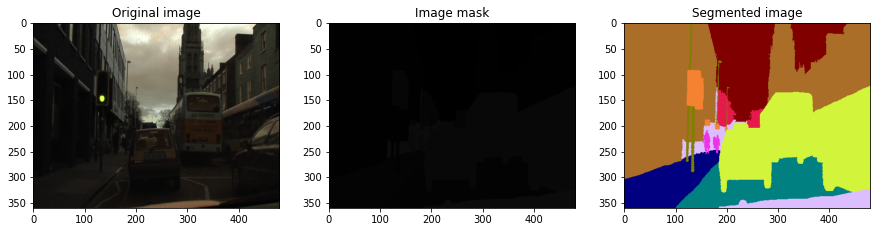

In [23]:
f, axarr = plt.subplots(1,3, figsize=(15,15))
axarr[0].imshow(tr_img)
axarr[0].title.set_text('Original image')
axarr[1].imshow(tr_msk)
axarr[1].title.set_text('Image mask')
axarr[2].imshow(tr_sgm_img)
axarr[2].title.set_text('Segmented image')

## *Sample of testing data*

In [29]:
# sample of testing data

test_img = cv2.imread(test_images_path + list_test_images[10]) # original image
test_msk = cv2.imread(test_masks_path + list_test_masks[10]) # its mask

In [50]:
# shape of original image

test_img.shape

(360, 480, 3)

In [51]:
# shape of mask

test_msk.shape

(360, 480, 3)

In [30]:
# unique value in original image

print(np.unique(test_img))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [31]:
# unique value in mask

print(np.unique(test_msk))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [32]:
test_img, test_sgm_img = get_colored_segmented_image(test_img, test_msk, class_colors, 12)

In [52]:
# shape of segmented colored image

test_sgm_img.shape

(360, 480, 3)

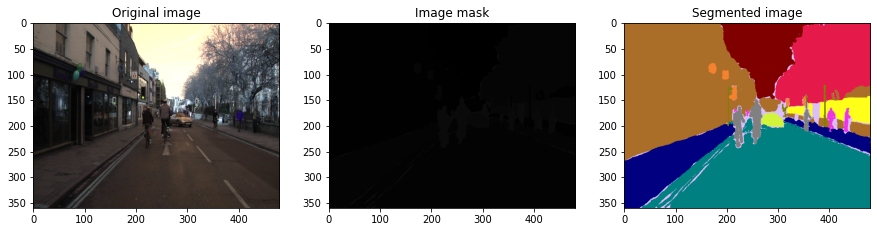

In [33]:
f, axarr = plt.subplots(1,3, figsize=(15,15))
axarr[0].imshow(test_img)
axarr[0].title.set_text('Original image')
axarr[1].imshow(test_msk)
axarr[1].title.set_text('Image mask')
axarr[2].imshow(test_sgm_img)
axarr[2].title.set_text('Segmented image')

## *Distribution of training data*

In [38]:
training_class_distribution = pd.DataFrame({
    'class' : ['Background','Sky','Building','Pole','Road','Pavement','Tree','Sign Symbol','Fence','Car','Pedestrian','Bicyclist']
})

In [39]:
num_of_pixels = np.zeros(12)
num_of_images = np.zeros(12)

for image in glob.iglob(f'{train_masks_path}/*'):
  # read image
  img = cv2.imread(image)

  # count the occurence of each class
  counter = Counter(img.flatten())

  # counter if a certain pixel was found throughout the images
  for i in range(12):
    if(np.isin(i, img.flatten())==True):
      num_of_images[i] = num_of_images[i] + 1

  # compute the total pixels of each class
  num_of_pixels[0] += counter[0]
  num_of_pixels[1] += counter[1]
  num_of_pixels[2] += counter[2]
  num_of_pixels[3] += counter[3]
  num_of_pixels[4] += counter[4]
  num_of_pixels[5] += counter[5]
  num_of_pixels[6] += counter[6]
  num_of_pixels[7] += counter[7]
  num_of_pixels[8] += counter[8]
  num_of_pixels[9] += counter[9]
  num_of_pixels[10] += counter[10]
  num_of_pixels[11] += counter[11]

In [40]:
training_class_distribution['num_of_pixels'] = num_of_pixels.astype(int)
training_class_distribution['num_of_images'] = num_of_images.astype(int)

In [44]:
training_class_distribution.sort_values(by='num_of_pixels', ascending=False)

,class,num_of_pixels,num_of_images
3,Pole,60230640,367
1,Sky,44250237,365
0,Background,32048301,366
5,Pavement,18500286,319
8,Fence,11159631,360
4,Road,8535255,349
11,Bicyclist,7511985,367
6,Tree,2231577,351
7,Sign Symbol,2143785,173
2,Building,1870047,366


In [45]:
training_class_distribution['num_of_pixels'].sum()

190252800

In [54]:
360*480*3*367

190252800

In the training data, all classes are not equally distributed, like sign symbol and pedestrian.

## *Distribution of testing data*

In [55]:
testing_class_distribution = pd.DataFrame({
    'class' : ['Background','Sky','Building','Pole','Road','Pavement','Tree','Sign Symbol','Fence','Car','Pedestrian','Bicyclist']
})

In [56]:
num_of_pixels = np.zeros(12)
num_of_images = np.zeros(12)

for image in glob.iglob(f'{test_masks_path}/*'):
  # read image
  img = cv2.imread(image)

  # count the occurence of each class
  counter = Counter(img.flatten())

  # counter if a certain pixel was found throughout the images
  for i in range(12):
    if(np.isin(i, img.flatten())==True):
      num_of_images[i] = num_of_images[i] + 1

  # compute the total pixels of each class
  num_of_pixels[0] += counter[0]
  num_of_pixels[1] += counter[1]
  num_of_pixels[2] += counter[2]
  num_of_pixels[3] += counter[3]
  num_of_pixels[4] += counter[4]
  num_of_pixels[5] += counter[5]
  num_of_pixels[6] += counter[6]
  num_of_pixels[7] += counter[7]
  num_of_pixels[8] += counter[8]
  num_of_pixels[9] += counter[9]
  num_of_pixels[10] += counter[10]
  num_of_pixels[11] += counter[11]

In [57]:
testing_class_distribution['num_of_pixels'] = num_of_pixels.astype(int)
testing_class_distribution['num_of_images'] = num_of_images.astype(int)

In [58]:
testing_class_distribution.sort_values(by='num_of_pixels', ascending=False)

,class,num_of_pixels,num_of_images
3,Pole,15159528,101
1,Sky,13593540,101
5,Pavement,8553375,101
0,Background,4804860,101
4,Road,4565253,101
7,Sign Symbol,1611591,101
10,Pedestrian,1161030,101
8,Fence,914148,101
11,Bicyclist,891813,101
6,Tree,467172,101


In the testing, all classes are equally distributed. That is, each image contains all 12 classes.

In [59]:
testing_class_distribution['num_of_pixels'].sum()

52358400

In [60]:
360*480*3*101

52358400